In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [25]:
#####DO NOT RERUN THIS CELL##### Generate Cities List
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count - 635 was the example given
len(cities) 

618

In [26]:
cities

['nicoya',
 'kodiak',
 'asau',
 'busselton',
 'quatre cocos',
 'sindor',
 'albany',
 'punta arenas',
 'atuona',
 'tuckahoe',
 'barrow',
 'severo-kurilsk',
 'mataura',
 'hithadhoo',
 'bakchar',
 'carnarvon',
 'rikitea',
 'apatou',
 'thompson',
 'vaini',
 'esperance',
 'airai',
 'sangar',
 'coihaique',
 'batagay-alyta',
 'bredasdorp',
 'nouadhibou',
 'rio gallegos',
 'viedma',
 'georgetown',
 'taolanaro',
 'dunedin',
 'cape town',
 'grand river south east',
 'barentsburg',
 'victoria',
 'kirakira',
 'kashi',
 'ambilobe',
 'hermanus',
 'krivosheino',
 'chardara',
 'college',
 'arraial do cabo',
 'new norfolk',
 'podor',
 'ojinaga',
 'rizhao',
 'otavi',
 'clyde river',
 'dikson',
 'amderma',
 'takoradi',
 'yellowknife',
 'santiago',
 'salalah',
 'ajdabiya',
 'iskateley',
 'abu jubayhah',
 'opobo',
 'bluff',
 'butaritari',
 'ushuaia',
 'kapaa',
 'east london',
 'hasaki',
 'westport',
 'nanchang',
 'bitung',
 'hobyo',
 'kutum',
 'cozumel',
 'mar del plata',
 'jamestown',
 'chernyshevskiy',
 

In [27]:
cities_list = []
cloudiness = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
tem_list = []
wind_speed_list = []

In [40]:
#Perform API Calls
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key


#loop cities from the list throught the url and get and output of weather and print it with city number and name
# Create an empty list to store the responses

#For loop matching city names with city_list using enumerate method
for i, city in enumerate(cities):
        if (i % 50 == 0 and i >= 50):
            index_counter = 1
            set_counter = set_counter + 1
            
        query_url = base_url + "&q=" + city
        response = requests.get(query_url).json()
        
        print(f"Processing {index_counter} of Set {set_counter} | {city}")
        
        index_counter = index_counter + 1
        
        try:
            cloudiness.append(response["clouds"]["all"])
            country_list.append(response["sys"]["country"])
            date_list.append(response["dt"])
            humidity_list.append(response["main"]["humidity"])
            lat_list.append(response["coord"]["lat"])
            lng_list.append(response["coord"]["lon"])
            tem_list.append(response["main"]["temp_max"])
            wind_speed_list.append(response["wind"]["speed"])
            cities_list.append(response["name"])
        except:
            print("Missing info")
            pass

        

Processing 19 of Set 84 | nicoya
Processing 20 of Set 84 | kodiak
Processing 21 of Set 84 | asau
Processing 22 of Set 84 | busselton
Processing 23 of Set 84 | quatre cocos
Processing 24 of Set 84 | sindor
Processing 25 of Set 84 | albany
Processing 26 of Set 84 | punta arenas
Processing 27 of Set 84 | atuona
Processing 28 of Set 84 | tuckahoe
Processing 29 of Set 84 | barrow
Processing 30 of Set 84 | severo-kurilsk
Processing 31 of Set 84 | mataura
Processing 32 of Set 84 | hithadhoo
Processing 33 of Set 84 | bakchar
Processing 34 of Set 84 | carnarvon
Processing 35 of Set 84 | rikitea
Processing 36 of Set 84 | apatou
Processing 37 of Set 84 | thompson
Processing 38 of Set 84 | vaini
Processing 39 of Set 84 | esperance
Processing 40 of Set 84 | airai
Processing 41 of Set 84 | sangar
Processing 42 of Set 84 | coihaique
Processing 43 of Set 84 | batagay-alyta
Processing 44 of Set 84 | bredasdorp
Processing 45 of Set 84 | nouadhibou
Processing 46 of Set 84 | rio gallegos
Processing 47 of 

Processing 26 of Set 88 | guerrero negro
Processing 27 of Set 88 | kavieng
Processing 28 of Set 88 | mozarlandia
Processing 29 of Set 88 | cedar city
Processing 30 of Set 88 | wanning
Processing 31 of Set 88 | sao filipe
Processing 32 of Set 88 | keetmanshoop
Processing 33 of Set 88 | gravdal
Processing 34 of Set 88 | shingu
Processing 35 of Set 88 | kieta
Processing 36 of Set 88 | castro
Processing 37 of Set 88 | baykit
Processing 38 of Set 88 | jati
Processing 39 of Set 88 | fortuna
Processing 40 of Set 88 | pisco
Processing 41 of Set 88 | ngukurr
Missing info
Processing 42 of Set 88 | kurilsk
Processing 43 of Set 88 | mandalgovi
Processing 44 of Set 88 | longyearbyen
Processing 45 of Set 88 | kenai
Processing 46 of Set 88 | egvekinot
Processing 47 of Set 88 | nova londrina
Processing 48 of Set 88 | baldwin
Processing 49 of Set 88 | miles city
Processing 50 of Set 88 | maxixe
Processing 1 of Set 89 | sisimiut
Processing 2 of Set 89 | morgan hill
Processing 3 of Set 89 | vestmannaeyja

Processing 3 of Set 93 | shugurovo
Processing 4 of Set 93 | polyarnyy
Processing 5 of Set 93 | yinchuan
Processing 6 of Set 93 | sunrise manor
Processing 7 of Set 93 | tandil
Processing 8 of Set 93 | nishihara
Processing 9 of Set 93 | omutinskoye
Missing info
Processing 10 of Set 93 | cap malheureux
Processing 11 of Set 93 | arlit
Processing 12 of Set 93 | iranduba
Processing 13 of Set 93 | zhanaozen
Processing 14 of Set 93 | samusu
Missing info
Processing 15 of Set 93 | shieli
Processing 16 of Set 93 | frondenberg
Processing 17 of Set 93 | shimanovsk
Processing 18 of Set 93 | iranshahr
Processing 19 of Set 93 | portmarnock
Processing 20 of Set 93 | barcelos
Processing 21 of Set 93 | parfenyevo
Processing 22 of Set 93 | jabiru
Missing info
Processing 23 of Set 93 | pandan
Processing 24 of Set 93 | miguel hidalgo
Processing 25 of Set 93 | parsabad
Processing 26 of Set 93 | grand centre
Missing info
Processing 27 of Set 93 | townsville
Processing 28 of Set 93 | kushmurun
Processing 29 of

In [42]:
#Convert Raw Data to DataFrame
# Create a DataFrame of frames using a dictionary of lists

weather_data = {
    "City": cities_list,
    "Cloudiness": cloudiness,
    "Country": country_list,
    "Date": date_list,
    "Humidity": humidity_list,
    "Lat": lat_list,
    "Lng": lng_list,
    "Max Temp": tem_list,
    "Wind Speed": wind_speed_list    
}

#Display the DataFrame
weather_df = pd.DataFrame(weather_data)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Nicoya,3,CR,1626834716,81,10.1483,-85.4520,81.95,8.52
1,Saint Paul Harbor,100,US,1626834716,92,57.7900,-152.4072,55.04,6.17
2,Asău,100,RO,1626834716,90,46.4333,26.4000,63.52,2.77
3,Busselton,79,AU,1626834717,87,-33.6500,115.3333,58.08,17.74
4,Quatre Cocos,17,MU,1626834717,68,-20.2078,57.7625,71.10,17.85


In [48]:
#Export the city data into a .csv.
# Export file as a CSV, without the Pandas index, but with the header
weather_df.to_csv("Output/weather.csv", index = False, header = True)
#weather_df.to_csv("Output/weather.csv", encoding="utf-8", index=False, header = True)

In [ ]:
#Inspect the data and remove the cities where the humidity > 100%.
#Skip this step if there are no cities that have humidity > 100%.
 #  Get the indices of cities that have humidity over 100%.
Int64Index([], dtype='int64')

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

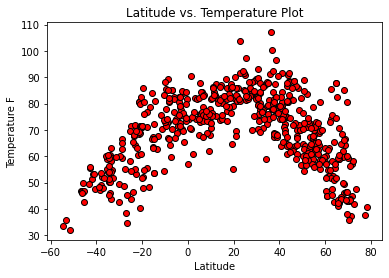

<Figure size 432x288 with 0 Axes>

In [49]:
#Plotting the Data
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs.

#Latitude vs. Temperature Plot
 # Tells matplotlib that we want to make a scatter plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature F")

 # Prints the scatter plot to the screen
plt.show()

 # Saves an image of our chart so that we can view it in a folder
plt.savefig("Output/Latitude_Temperature.png")
plt.show()
#This is plotting the relationship between a location's latitude and temperature - the highest max temps for our sample size appear at 20 and 40 degrees latitude. 

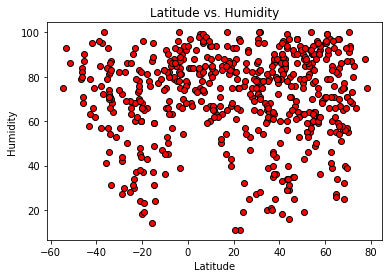

<Figure size 432x288 with 0 Axes>

In [50]:
#Latitude vs. Humidity Plot
# Tells matplotlib that we want to make a scatter plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

 # Prints the scatter plot to the screen
plt.show()

 # Saves an image of our chart so that we can view it in a folder
plt.savefig("Output/Latitude_Humidity.png")
plt.show()
#This is plotting the relationship between a location's latitude and humidity.

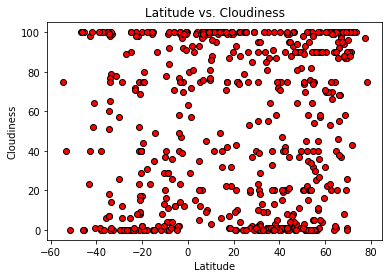

<Figure size 432x288 with 0 Axes>

In [51]:
#Latitude vs. Cloudiness Plot
# Tells matplotlib that we want to make a scatter plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

 # Prints the scatter plot to the screen
plt.show()

 # Saves an image of our chart so that we can view it in a folder
plt.savefig("Output/Latitude_Cloudiness.png")
plt.show()
#This is plotting the relationship between a location's latitude and cloudiness.

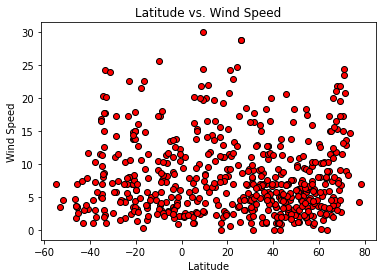

<Figure size 432x288 with 0 Axes>

In [52]:
#Latitude vs. Wind Speed Plot
# Tells matplotlib that we want to make a scatter plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

 # Prints the scatter plot to the screen
plt.show()

 # Saves an image of our chart so that we can view it in a folder
plt.savefig("Output/Latitude_WindSpeed.png")
plt.show()
#This is plotting the relationship between a location's latitude and wind speed.

In [54]:
#Linear Regression

northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere = weather_df.loc[weather_df["Lat"] < 0]

import scipy.stats as st

def linear_agression(x,y):
    print(f"The r-squared is {round(st.pearsonr(x,y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values, "r-")
    return line_eq

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b))
    

The r-squared is -0.61


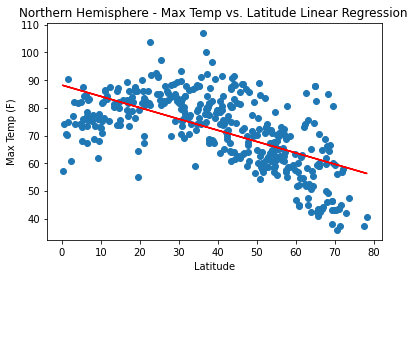

In [55]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression (Print r value)
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])
annotate(equation, 0, 0)
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression ")
plt.ylabel("Max Temp F")
plt.xlabel("Latitude")
plt.savefig("Output/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

The r-squared is 0.77


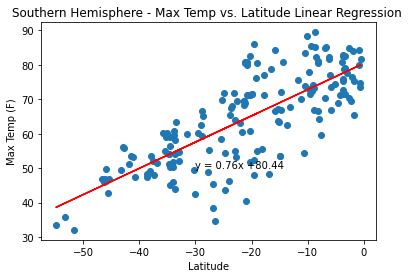

In [57]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression (print r value)
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])

annotate(equation, -30, 50)
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression ")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.savefig("Output/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
#You can see by both the Northern and Southern charts that the closer you get to the equator, the higher the max temps get.

The r-squared is -0.09


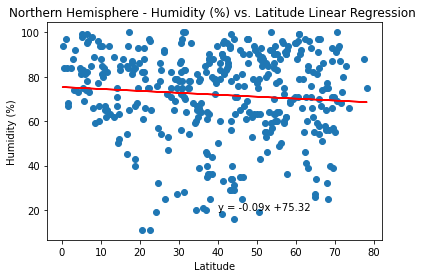

In [58]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

annotate(equation, 40, 20)
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression ")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig("output/Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")

The r-squared is 0.02


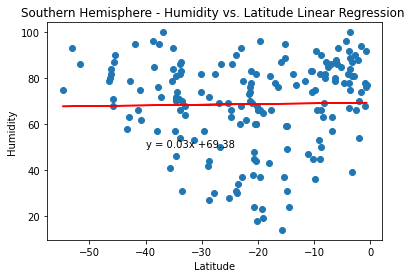

In [59]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

annotate(equation, -40, 50)
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression ")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig("Output/Southern Hemisphere - Humidity vs. Latitude Linear Regression.png")
#There is no linear relationship between the variables of humidity and latitude, represented by the nearly flat lines. 

The r-squared is -0.01


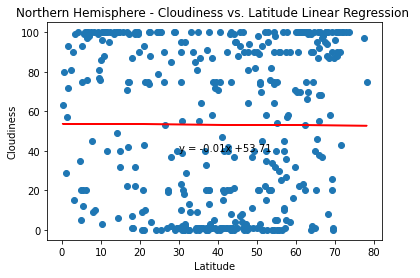

In [60]:
 #Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

annotate(equation, 30, 40)
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression ")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig("Output/Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png") 

The r-squared is -0.05


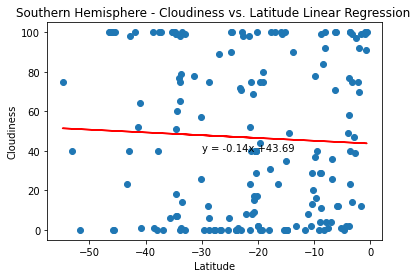

In [61]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

annotate(equation, -30, 40)
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression ")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig("Output/Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")
#Again there appears to be no linear relationship between latitude and cloudiness. 

The r-squared is -0.05


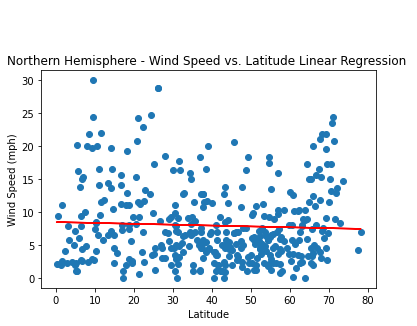

In [62]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

annotate(equation, 20, 40)
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression ")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.savefig("Output/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

The r-squared is 0.01


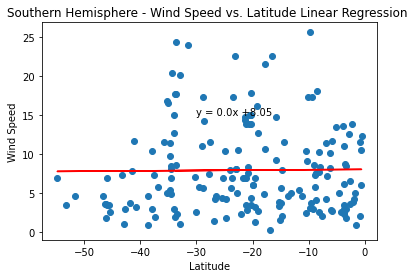

In [63]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

annotate(equation, -30, 15)
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression ")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.savefig("Output/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
#Again there appears to be no linear relationship based on the flat line regression of latitude and wind speed. 